In [130]:
# %pip install scikit-fuzzy (download library)

In [131]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import membership as mf
import matplotlib.pyplot as plt

In [132]:
# Define fuzzy variables
engine_size = ctrl.Antecedent(np.arange(0, 6.6, 0.1), 'engine_size')
fuel_consumption = ctrl.Antecedent(np.arange(2.9, 26, 0.1), 'fuel_consumption')
co2_emission = ctrl.Consequent(np.arange(69, 401, 1), 'co2_emission')

c:\Users\qishe\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


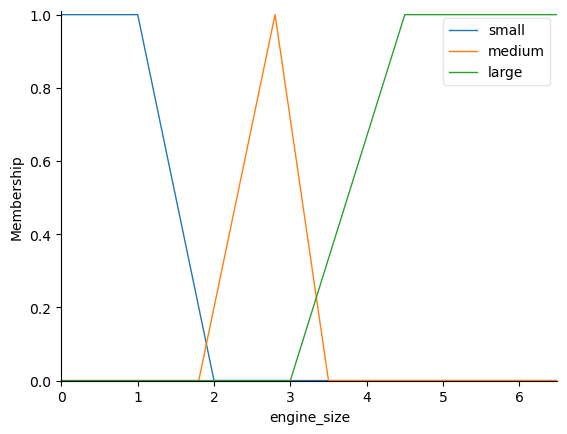

In [133]:
# Engine Size (L)
engine_size['small'] = mf.trapmf(engine_size.universe, [0.0, 0.0, 1.0, 2.0])
engine_size['medium'] = mf.trimf(engine_size.universe, [1.8, 2.8, 3.5])
engine_size['large'] = mf.trapmf(engine_size.universe, [3.0, 4.5, 6.5, 6.5])
engine_size.view()

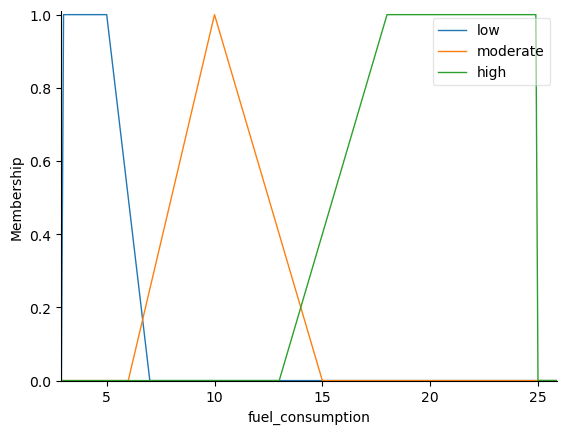

In [134]:
# Fuel Consumption (L/100km)
fuel_consumption['low'] = mf.trapmf(fuel_consumption.universe, [3, 3, 5, 7])
fuel_consumption['moderate'] = mf.trimf(fuel_consumption.universe, [6, 10, 15])
fuel_consumption['high'] = mf.trapmf(fuel_consumption.universe, [13, 18, 25, 25])
fuel_consumption.view()

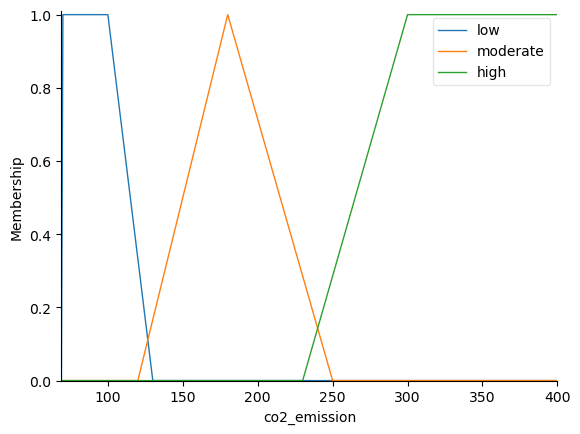

In [135]:
# CO2 Emission (g/km)
co2_emission['low'] = mf.trapmf(co2_emission.universe, [70, 70, 100, 130])
co2_emission['moderate'] = mf.trimf(co2_emission.universe, [120, 180, 250])
co2_emission['high'] = mf.trapmf(co2_emission.universe, [230, 300, 400, 400])
co2_emission.view()

In [136]:
# Define fuzzy rules (based on your table)
rule1 = ctrl.Rule(engine_size['small'] & fuel_consumption['low'], co2_emission['low'])
rule2 = ctrl.Rule(engine_size['small'] & fuel_consumption['moderate'], co2_emission['moderate'])
rule3 = ctrl.Rule(engine_size['small'] & fuel_consumption['high'], co2_emission['moderate'])

rule4 = ctrl.Rule(engine_size['medium'] & fuel_consumption['low'], co2_emission['moderate'])
rule5 = ctrl.Rule(engine_size['medium'] & fuel_consumption['moderate'], co2_emission['moderate'])
rule6 = ctrl.Rule(engine_size['medium'] & fuel_consumption['high'], co2_emission['high'])

rule7 = ctrl.Rule(engine_size['large'] & fuel_consumption['low'], co2_emission['moderate'])
rule8 = ctrl.Rule(engine_size['large'] & fuel_consumption['moderate'], co2_emission['high'])
rule9 = ctrl.Rule(engine_size['large'] & fuel_consumption['high'], co2_emission['high'])

# Combine all rules
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]

In [137]:
co2_ctrl = ctrl.ControlSystem(rules)
co2_sim = ctrl.ControlSystemSimulation(co2_ctrl)

In [ ]:
def main():
    print("=== Vehicle CO2 Emission Estimator ===")

    try:
        engine_input = float(input("Enter Engine Size (L, 1.0-6.5L): "))
        fuel_input = float(input("Enter Fuel Consumption (L/100km, 3-25L/100km): "))
    except ValueError:
        print("Invalid input! Please enter numeric values.")
        return  # exit function if input is invalid

    # Set inputs for the fuzzy system
    co2_sim.input['engine_size'] = engine_input
    co2_sim.input['fuel_consumption'] = fuel_input

    # Compute fuzzy output
    co2_sim.compute()

    # Display crisp output
    print(f"Estimated CO2 Emission: {co2_sim.output['co2_emission']:.2f} g/km")

    # Plot input membership functions with current input highlighted
    engine_size.view(sim=co2_sim)
    fuel_consumption.view(sim=co2_sim)

    # Plot output membership function with aggregation and defuzzification
    co2_emission.view(sim=co2_sim)
    plt.show()

=== Vehicle CO2 Emission Estimator ===
Estimated CO2 Emission: 98.08 g/km


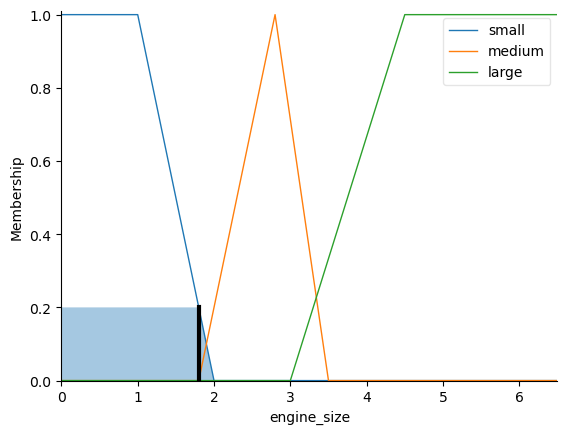

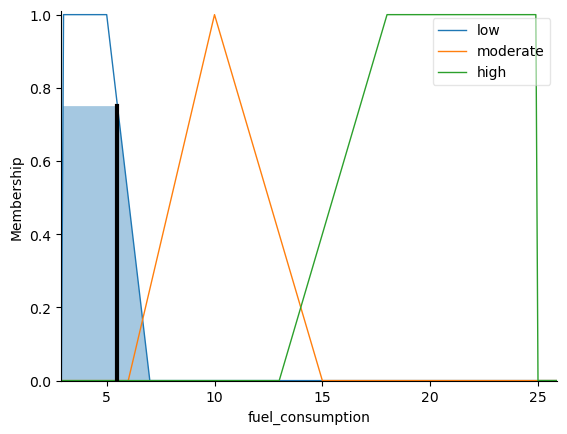

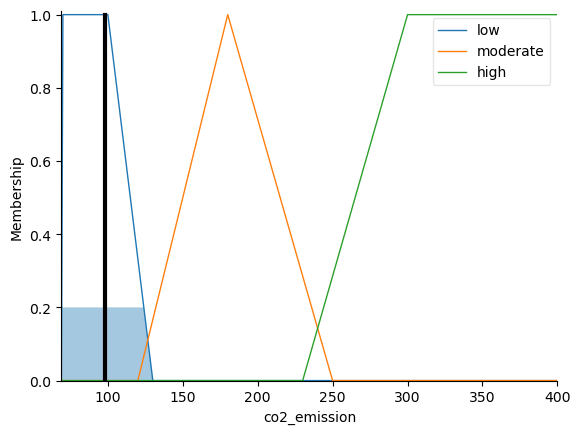

In [139]:
if __name__ == "__main__":
    main()
